In [ ]:
 '''
step 01 : Imporitng the libraries
step 02 : Read the data
step 03 : check teh shape of the data
step 04 : View the samples
step 05 : Basic EDA
step 06 : To check the null values
step 07 : Data preprocessing - converting categorical into numerical ( by - one hot encoded)
step 08 : Train Test Split
step 09 : Training the model
step 10 : Testing the model
step 11 : Calculating the mean and squared error loss and accuracy (R2 score)
'''

'\nstep 01 : Imporitng the libraries\nstep 02 : Read the data\nstep 03 : check teh shape of the data\nstep 04 : View the samples\nstep 05 : Basic EDA\nstep 06 : To check the null values\nstep 07 : Data preprocessing - converting categorical into numerical ( by - one hot encoded)\nstep 08 : Train Test Split\nstep 09 : Training the model \nstep 10 : Testing the model \nstep 11 : Calculating the mean and squared error loss and accuracy (R2 score)\n'

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
#set figure size
plt.rcParams['figure.figsize'] = [8,5]

Data Read

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

EDA with bmi and charges

Text(0.5, 1.0, 'BMI vs charges')

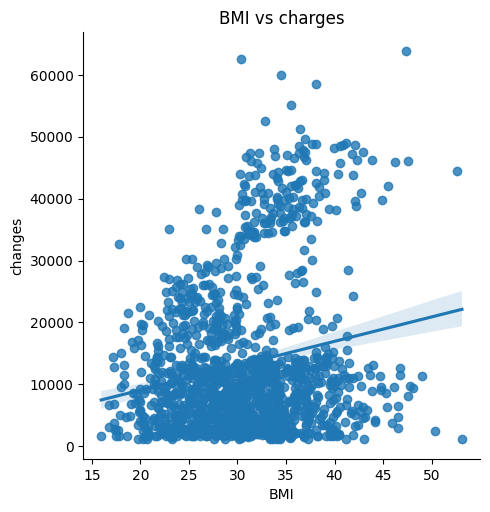

In [ ]:
# Plotting between bmi(continuous) and charges (continuous)
# bmi - body mass index
sns.lmplot(x='bmi',y='charges',data=df)
plt.xlabel('BMI')
plt.ylabel('changes')
plt.title('BMI vs charges')

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

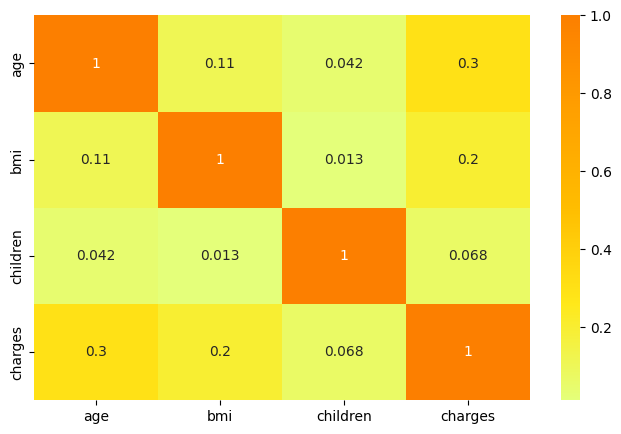

In [ ]:
# correlation plot
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)

<Axes: xlabel='charges', ylabel='Count'>

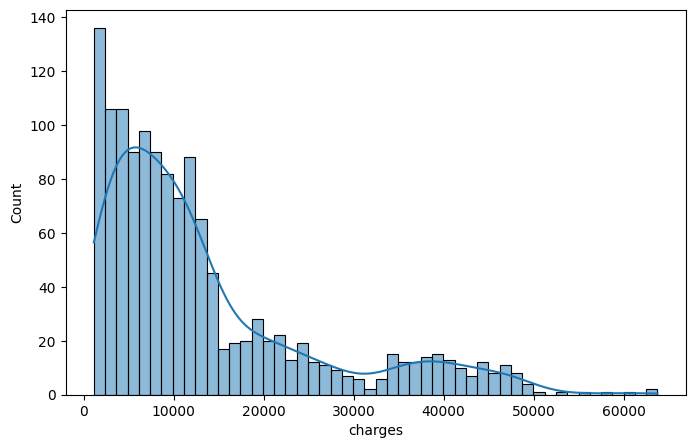

In [ ]:
#target variable
sns.histplot(x='charges',data=df,bins=50,kde=True,fill=True)

<Axes: xlabel='charges', ylabel='Count'>

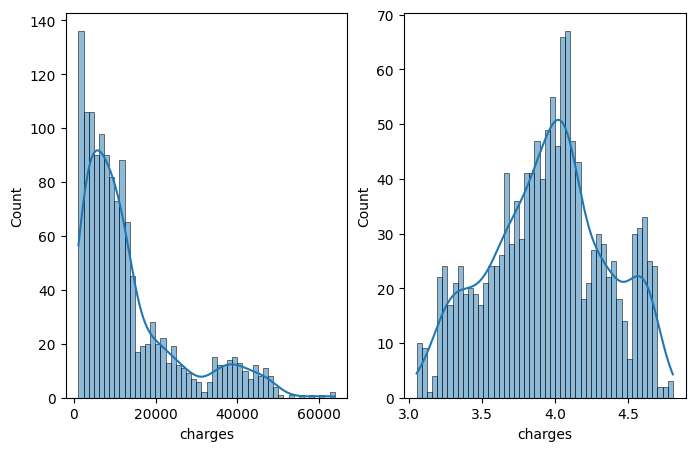

In [ ]:
'''
here the distribution is right skewed
so, to correct the skewness in the data, we perform log transformation

'''
# to get two plots side by side
fig,(ax1,ax2) = plt.subplots(ncols=2)
#target varaible
sns.histplot(df['charges'],kde=True,bins=50,fill=True,ax=ax1)
## To correct the skewness in the data, we perform log transformation
sns.histplot(np.log10(df['charges']),kde=True,fill=True,bins=50,ax=ax2)


<Axes: xlabel='sex', ylabel='charges'>

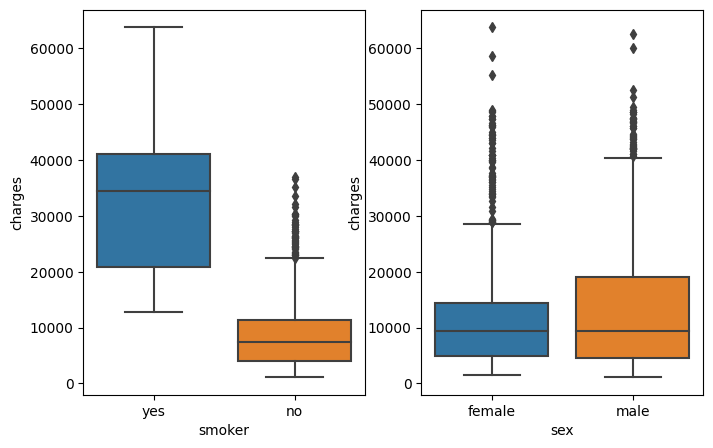

In [ ]:
## plot smoker with charges and sex wiht charges
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(x='smoker',y='charges',data=df,ax=ax1)
sns.boxplot(x='sex',y='charges',data = df,ax=ax2)

In [ ]:
## children vs charges

In [ ]:
df.children.unique()

array([0, 1, 3, 2, 5, 4])

<Axes: xlabel='children', ylabel='charges'>

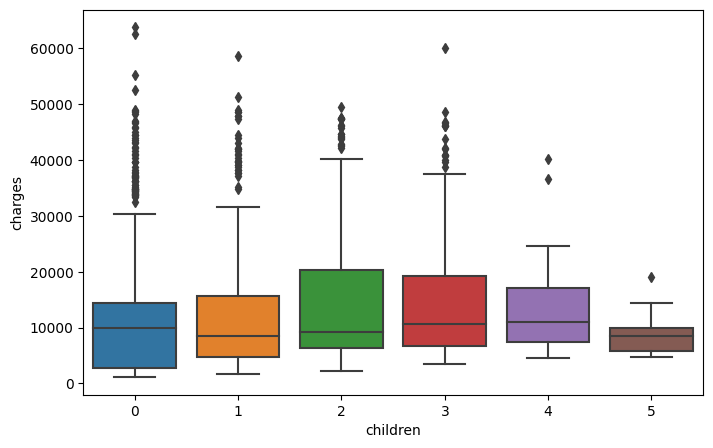

In [ ]:
sns.boxplot(x='children',y='charges',data=df)

Data Preprocessing - Encoding

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
categorical_columns = ['sex','children','smoker','region']
# one hot encoding
df_encoded = pd.get_dummies(data=df,prefix='ONE',prefix_sep='_',columns=categorical_columns,drop_first=True,dtype='int8')

In [ ]:
df_encoded.head()

,age,bmi,charges,ONE_male,ONE_1,ONE_2,ONE_3,ONE_4,ONE_5,ONE_yes,ONE_northwest,ONE_southeast,ONE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_encoded['charges'] = np.log10(df_encoded['charges'])

In [ ]:
df_encoded.head()

,age,bmi,charges,ONE_male,ONE_1,ONE_2,ONE_3,ONE_4,ONE_5,ONE_yes,ONE_northwest,ONE_southeast,ONE_southwest
0,19,27.900,4.227499,0,0,0,0,0,0,1,0,0,1
1,18,33.770,3.236928,1,1,0,0,0,0,0,0,1,0
2,28,33.000,3.648308,1,0,0,1,0,0,0,0,1,0
3,33,22.705,4.342116,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3.587358,1,0,0,0,0,0,0,1,0,0


In [ ]:
x = df_encoded.drop(['charges'],axis=1) # input features
y = df_encoded['charges'] # target variable

In [ ]:
# np.random.seed(42)
#np.random.randn(2,1)

array([[-0.50551504],
       [ 0.04233066]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)

Training the Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
lin_reg.coef_

array([ 0.01439002,  0.00587029, -0.02943099,  0.06490821,  0.11852708,
        0.10600906,  0.22728308,  0.20239429,  0.67336524, -0.02425312,
       -0.06365815, -0.05798184])

In [ ]:
lin_reg.intercept_

3.0657592155426676

Test the Model

In [ ]:
y_pred = lin_reg.predict(x_test)

In [ ]:
y_pred

array([4.05111071, 3.76323003, 4.49471303, 3.94587129, 3.65154412,
       3.90016511, 4.66880948, 3.71809718, 4.11984569, 4.75822147,
       3.5298516 , 4.79365531, 3.5607964 , 4.1019963 , 3.82468072,
       3.7059901 , 3.74948038, 3.52244257, 4.53481197, 4.53638645,
       4.86542784, 3.9776379 , 3.84918757, 3.99032979, 4.59907446,
       3.69570472, 3.71458617, 4.17578721, 3.46744487, 3.96034688,
       4.07722567, 3.54699262, 3.65033397, 4.10456405, 3.81135188,
       4.26711922, 4.06901467, 3.92135685, 3.99900304, 3.64326587,
       3.99441526, 4.6013979 , 3.99161371, 4.58591857, 4.02182527,
       4.03845297, 3.67917003, 3.71615623, 3.93688137, 3.77572784,
       4.08868301, 3.84225304, 3.96881833, 3.6052219 , 3.66610261,
       4.06214373, 4.0207601 , 3.98127049, 3.83175689, 4.17762365,
       4.32177717, 3.6886493 , 3.43380444, 3.66598796, 3.53355203,
       3.74664171, 3.48583603, 3.45059346, 3.66158078, 4.10661913,
       3.76913543, 4.59179609, 3.94060076, 4.48647861, 3.48334

In [ ]:
mean_squared_error(y_pred,y_test) # loss is 0.035

0.03532625850724221

R2 Score

In [ ]:
lin_reg.score(x_test,y_test) # 0.779*100 = 77.9% accurate

0.7795687545055319